In [1]:
#importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading in the data.
data= pd.read_csv("SalaryData.csv")

In [3]:
#creating the respective column vectors for the design matrix.
ones=[1 for i in range(0,len(data))]
YE_1 =data["YearsExperience"]
YE_2=YE_1**2
YE_3= YE_1**3

In [4]:
#creating a pandas dataframe object which represents the design matrix H of shape 30x4. 
H = pd.DataFrame({"ones":ones,
                  "YrsExp":YE_1,
                  "YrsExp_Sq":YE_2,
                  "YrsExp_Cb":YE_3,
                 })

In [5]:
#creating the target column vector Y of shape 30x1.
Y= data["Salary"]

In [6]:
#initialising the mean and the covariance for the parameter vector theta.
previous_mean = [40000,0,0,0]
previous_cov = np.eye(4)*100
#setting the std_dev of the measurment
std_dev=250

In [7]:
#computing the new mean and covariance of the parameter vector theta after first 10 observations.
for i in range(1,11):
    #For each iteration, one row from H and Y is being used.
    h = H[i-1:i] 
    y = Y[i-1:i] 
    #calculating the new mean and covariance based on the posterior distribution of theta.
    new_cov = np.linalg.inv((1.0/std_dev**2)*np.dot(h.T,h) + np.linalg.inv(previous_cov))
    new_mean = np.dot(new_cov,(1.0/std_dev**2)*np.dot(h.T,y) + np.dot(np.linalg.inv(previous_cov),previous_mean))
    #for the next iteration, updating the values of the previous mean and covariance.
    previous_cov= new_cov
    previous_mean =new_mean

In [8]:
print("The new mean vector for theta after first 10 observations:" + str(new_mean))

The new mean vector for theta after first 10 observations:[4.00580979e+04 1.98796186e+02 5.67332265e+02 3.41185030e+01]


In [9]:
print("The new covariance matrix for theta after first 10 observations:\n" + str(new_cov))

The new covariance matrix for theta after first 10 observations:
[[ 98.99731623  -1.95964335  -3.57467222   0.2673962 ]
 [ -1.95964335  95.3294411  -10.38902585  -0.1321786 ]
 [ -3.57467222 -10.38902585  72.06425626  -8.32226437]
 [  0.2673962   -0.1321786   -8.32226437   1.07892547]]


In [10]:
#initialising the mean and the covariance for the parameter vector theta.
previous_mean = [40000,0,0,0]
previous_cov = np.eye(4)*100
#std_dev of the measurment
std_dev=250

In [11]:
#computing the new mean and covariance of the parameter vector theta after 30 observations.
for i in range(1,31):
    #For each iteration, one row from H and Y is being used.
    h = H[i-1:i] 
    y = Y[i-1:i] 
    #calculating the new mean and covariance based on the posterior distribution of theta.
    new_cov = np.linalg.inv((1.0/std_dev**2)*np.dot(h.T,h) + np.linalg.inv(previous_cov))
    new_mean = np.dot(new_cov,(1.0/std_dev**2)*np.dot(h.T,y) + np.dot(np.linalg.inv(previous_cov),previous_mean))
    #for the next iteration, updating the values of the previous mean and covariance.
    previous_cov= new_cov
    previous_mean =new_mean

In [12]:
print("The new mean vector for theta after 30 observations:" + str(new_mean))

The new mean vector for theta after 30 observations:[40072.17057539   355.67982027  1324.71598938   -53.82422696]


In [13]:
print("The new covariance matrix for theta after 30 observations:\n" + str(new_cov))

The new covariance matrix for theta after 30 observations:
[[ 98.74096776  -2.7336052   -5.02986195   0.43689653]
 [ -2.7336052   91.88701872 -21.13117985   1.17950301]
 [ -5.02986195 -21.13117985  26.78638907  -2.63424452]
 [  0.43689653   1.17950301  -2.63424452   0.28046664]]


In [14]:
#generating the parameters from a multivariate gaussian distribution with the updated mean and covariance.
parameters = np.random.multivariate_normal(new_mean, new_cov, 1).T
print("The parameter vector theta is : " + str(parameters.T))

The parameter vector theta is : [[40069.27271109   350.85017957  1333.02380048   -54.58591575]]


In [15]:
#Calculating the predictions utilising the latest parameter vector theta and the design matrix H.
Y_sal=[float(np.dot(H[i:i+1],parameters)) for i in range(0,len(data))] 

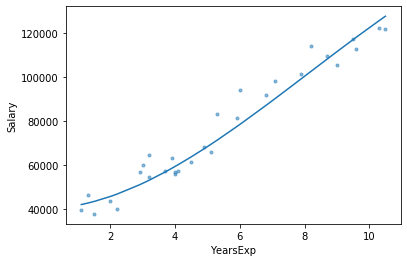

In [16]:
#plotting the fitted curve along with the observed data.
x = list(YE_1)
y = list(Y)
area = np.pi*3
plt.scatter(x, y, s=area, alpha=0.5)
plt.xlabel('YearsExp')
plt.ylabel('Salary')
x.sort()
Y_sal.sort()
plt.plot(x, Y_sal)
plt.show()

In [17]:
#initialising the mean and the covariance for the parameter vector theta.
previous_mean = [40000,0,0,0]
previous_cov = np.eye(4)*100
#setting the std_dev of the measurment
std_dev=250

In [18]:
#computing the new mean and covariance of the parameter vector theta after 30 observations using the woodbury matrix identity
for i in range(1,31):
    #For each iteration, one row from H and Y is being used.
    h = H[i-1:i]
    y = Y[i-1:i]
    #calculating the new mean and covariance based on the posterior distribution of theta.
    new_cov = previous_cov - np.dot(np.dot(np.dot(previous_cov,h.T),np.linalg.inv(np.add(np.dot(np.dot(h,previous_cov),h.T),std_dev**2))),np.dot(h,previous_cov))
    new_mean = np.dot(new_cov,(1.0/std_dev**2)*np.dot(h.T,y) + np.dot(np.linalg.inv(previous_cov),previous_mean))
    #for the next iteration, updating the values of the previous mean and covariance.
    previous_mean =new_mean
    previous_cov= new_cov

In [19]:
print("The new mean vector for theta after 30 observations:" + str(new_mean))

The new mean vector for theta after 30 observations:[40072.17057539   355.67982027  1324.71598938   -53.82422696]


In [20]:
print("The new covariance matrix for theta after 30 observations:\n" + str(new_cov))

The new covariance matrix for theta after 30 observations:
[[ 98.74096776  -2.7336052   -5.02986195   0.43689653]
 [ -2.7336052   91.88701872 -21.13117985   1.17950301]
 [ -5.02986195 -21.13117985  26.78638907  -2.63424452]
 [  0.43689653   1.17950301  -2.63424452   0.28046664]]


In [21]:
#generating the parameters from a multivariate gaussian distribution with the updated mean and covariance.
parameters = np.random.multivariate_normal(new_mean, new_cov, 1).T
print("The parameter vector theta is : " + str(parameters.T))

The parameter vector theta is : [[40067.76744828   349.66889652  1323.6917115    -53.55342323]]


In [22]:
#Calculating the predictions utilising the latest parameter vector theta and the design matrix H.
Y_sal=[float(np.dot(H[i:i+1],parameters)) for i in range(0,len(data))] 

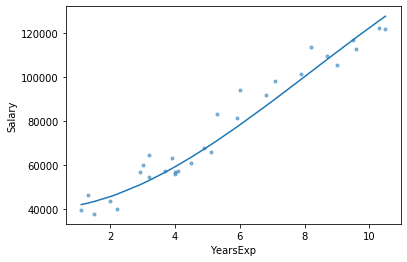

In [23]:
#plotting the fitted curve along with the observed data.
x = list(YE_1)
y = list(Y)
area = np.pi*3
plt.scatter(x, y, s=area, alpha=0.5)
plt.xlabel('YearsExp')
plt.ylabel('Salary')
x.sort()
Y_sal.sort()
plt.plot(x, Y_sal)
plt.show()